# Analysis of Clusters With Both Knotted and Unknotted Sequences

Task description:

### 1. For each cluster:
- there is a reference sequence (`is_ref=True`)
- find the most similar sequence to the reference sequence, that has the opposite label (max identity or min. edited distance) 
- prepare dataset with four columns: `unknotted_seq`, `knotted_seq`, `identity`, `edit_distance`
- visualise the distribution (histogram) of `edit_distance`, and the sequences with minimal `edit_distance` (/ TOP 10)

### 2. For the 20 most similar pairs:
- try to predict their structure with OmegaFold or ESM Fold and get knotted predictions using https://topoly.cent.uw.edu.pl/ [demo]
- check the InterPro families those pairs belong to

In [1]:
!pip install cdhit_reader --quiet

In [2]:
INPUT = 'both_knotted_and_unknotted.pkl'

# filter based on the length of an amino acid sequence:
MINLENGTH = 70
MAXLENGTH = 1000

In [3]:
import pickle
import cdhit_reader 

with open(INPUT, 'rb') as file:
    data = pickle.load(file)

In [4]:
import pandas as pd

knotted = pd.read_csv('/home/jovyan/data/latest/spout_all_knotted.csv').query(f'uniprotEnd >= {MINLENGTH}').query(f'uniprotEnd <= {MAXLENGTH}')
unknotted = pd.read_csv('/home/jovyan/data/latest/spout_all_unknotted.csv').query(f'uniprotEnd >= {MINLENGTH}').query(f'uniprotEnd <= {MAXLENGTH}')

In [5]:
knotted

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Max Topology,Max Freq,Knot Core
0,AF-A0A011SIZ1-F1,4,96.12,1,397,MSALRLFTSESVTEGHPDKICDQISDSVLDALLTVDPGSRVAVETL...,397.0,3_1,0.764,"(16, 283)"
1,AF-A0A011VZ55-F1,4,95.12,1,161,MLRVNLITVGKLKEKYWRDAAAEYVKRLGAFCKIEIVELNEYRLSD...,161.0,3_1,0.726,"(77, 127)"
2,AF-A0A014C2M6-F1,4,92.12,1,157,MIHVVLYEPEIPANTGNIIRLCANTGAQLHLVKPLGFELDDKKLKR...,157.0,3_1,0.784,"(80, 123)"
3,AF-A0A014CPN0-F1,4,92.19,1,157,MIHVVLYEPEIPANTGNIIRLCANTGAQLHLVKPLGFELDDKKLKR...,157.0,3_1,0.822,"(80, 123)"
4,AF-A0A014E203-F1,4,95.31,1,159,MKIRILTIGQKMPAWVLTGFEDYFKRIQPFVQTQVIELPMAKRGKN...,159.0,3_1,0.682,"(75, 124)"
...,...,...,...,...,...,...,...,...,...,...
461303,AF-X6I2L6-F1,4,95.56,1,421,MTRQNYFFTSESVAEGHPDKVCDRISDEIVDLVYREAKKTGMDPWK...,421.0,3_1,0.714,"(15, 296)"
461304,AF-X6JM67-F1,4,92.62,1,285,MNERHAGAPGQVKEVTSLANPLIKDIKALAQKKFRDQQNAFMAEGL...,285.0,3_1,0.864,"(205, 247)"
461305,AF-X7S473-F1,4,94.50,1,256,MEIIESKENKLIKSLKKLKQKKYRDSENKFLAEGYKFLDYNYSPEI...,256.0,3_1,0.738,"(183, 225)"
461306,AF-X7XVD6-F1,4,92.31,1,356,MPWSVVAPVLAFVALTLTWGQKIGPLLGLLEAVLLAGAVLAAVHHA...,356.0,3_1,0.568,"(48, 290)"


Check duplicates in ID:

In [6]:
knotted[knotted.duplicated(['ID', 'uniprotSequence'], keep=False)]

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Max Topology,Max Freq,Knot Core
39,AF-A0A059FSW5-F1,4,82.25,1,741,MLAAIRIRARITDRSPLLSRSGQWIGALLTAAAFAAGAAWADQEPR...,741.0,6_3,0.880,"(112, 656)"
40,AF-A0A059FSW5-F1,4,82.25,1,741,MLAAIRIRARITDRSPLLSRSGQWIGALLTAAAFAAGAAWADQEPR...,741.0,6_3,0.880,"(112, 656)"
58,AF-A0A060Y2J7-F1,4,76.50,1,944,MLFLTLLMCYNPYVFGLFEDINIEEDLSPDFDSPRRVPRQVKSMLT...,944.0,3_1,0.870,"(92, 612)"
59,AF-A0A060Y2J7-F1,4,76.50,1,944,MLFLTLLMCYNPYVFGLFEDINIEEDLSPDFDSPRRVPRQVKSMLT...,944.0,3_1,0.870,"(92, 612)"
106,AF-A0A073CJE1-F1,4,80.00,1,835,MTILFMNSLSNIAGLSLGIMIFNSLNFMVNTPPSFAILSQQLNRQS...,835.0,6_3,0.764,"(118, 662)"
...,...,...,...,...,...,...,...,...,...,...
461183,AF-R1IT29-F1,4,81.62,1,707,MYSLKISKVSFKAPLADWLLTALFIMFLPAIAFASEEEGGLYIQTQ...,707.0,6_3,0.888,"(97, 663)"
461236,AF-U3J3N9-F1,4,77.00,1,894,MILWLWLFWGFSIAAGQPDSELLARYLEEKLMADYSVVEQVVRRVP...,894.0,3_1,0.842,"(100, 630)"
461237,AF-U3J3N9-F1,4,77.00,1,894,MILWLWLFWGFSIAAGQPDSELLARYLEEKLMADYSVVEQVVRRVP...,894.0,3_1,0.842,"(100, 630)"
461282,AF-W6ULK4-F1,4,83.81,1,770,MHGLIICNKWPQVPVPLEKFDVHAVIVNNNADVSCEFAYKNSTSEI...,770.0,3_1,0.440,"(56, 598)"


In [7]:
unknotted[unknotted.duplicated(['ID', 'uniprotSequence'], keep=False)]

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length
269,AF-A0A0C3EUB3-F1,4,73.19,1,713,MIYAGIYTIDVSNHHAWLPQLSLTSQTKLHHTASRTLLTQTFVNPS...,713
270,AF-A0A0C3EUB3-F1,4,73.19,1,713,MIYAGIYTIDVSNHHAWLPQLSLTSQTKLHHTASRTLLTQTFVNPS...,713
318,AF-A0A0D7A2F6-F1,4,70.75,1,897,MTSLNGIVYGSPGNLTHLPLQECRAKVLVIDVSARITLTQVYTNPL...,897
319,AF-A0A0D7A2F6-F1,4,70.75,1,897,MTSLNGIVYGSPGNLTHLPLQECRAKVLVIDVSARITLTQVYTNPL...,897
673,AF-A0A0R3XCU6-F1,4,81.88,1,461,MYGGVTRMHGLVICNKWPQLPVPLERLDIHAVFVNNNAEVCCAFTY...,461
...,...,...,...,...,...,...,...
330813,AF-G3Q9J4-F1,4,79.62,1,966,MCVFEGFYVPGNMRRPLLLLLGLLLLQQGRCFEFVIDGEWEDEMSD...,966
330935,AF-Q4S5G1-F1,4,75.12,1,979,MRRPLLPLLLGLLLLQQGRCFLEFVIHEETSNPQSRQQRHQRALLT...,979
330936,AF-Q4S5G1-F1,4,75.12,1,979,MRRPLLPLLLGLLLLQQGRCFLEFVIHEETSNPQSRQQRHQRALLT...,979
330938,AF-Q5RB37-F1,4,84.42,1,876,MVALSHLGSALQLGSLWGFPRSPFRLLGKRSLPEGVANGIEVYSTK...,876


Remove duplicates:

In [8]:
knotted = knotted.drop_duplicates(subset=['ID', 'uniprotSequence'], keep='first')
unknotted = unknotted.drop_duplicates(subset=['ID', 'uniprotSequence'], keep='first')

In [9]:
knotted

,ID,latestVersion,globalMetricValue,uniprotStart,uniprotEnd,uniprotSequence,Length,Max Topology,Max Freq,Knot Core
0,AF-A0A011SIZ1-F1,4,96.12,1,397,MSALRLFTSESVTEGHPDKICDQISDSVLDALLTVDPGSRVAVETL...,397.0,3_1,0.764,"(16, 283)"
1,AF-A0A011VZ55-F1,4,95.12,1,161,MLRVNLITVGKLKEKYWRDAAAEYVKRLGAFCKIEIVELNEYRLSD...,161.0,3_1,0.726,"(77, 127)"
2,AF-A0A014C2M6-F1,4,92.12,1,157,MIHVVLYEPEIPANTGNIIRLCANTGAQLHLVKPLGFELDDKKLKR...,157.0,3_1,0.784,"(80, 123)"
3,AF-A0A014CPN0-F1,4,92.19,1,157,MIHVVLYEPEIPANTGNIIRLCANTGAQLHLVKPLGFELDDKKLKR...,157.0,3_1,0.822,"(80, 123)"
4,AF-A0A014E203-F1,4,95.31,1,159,MKIRILTIGQKMPAWVLTGFEDYFKRIQPFVQTQVIELPMAKRGKN...,159.0,3_1,0.682,"(75, 124)"
...,...,...,...,...,...,...,...,...,...,...
461303,AF-X6I2L6-F1,4,95.56,1,421,MTRQNYFFTSESVAEGHPDKVCDRISDEIVDLVYREAKKTGMDPWK...,421.0,3_1,0.714,"(15, 296)"
461304,AF-X6JM67-F1,4,92.62,1,285,MNERHAGAPGQVKEVTSLANPLIKDIKALAQKKFRDQQNAFMAEGL...,285.0,3_1,0.864,"(205, 247)"
461305,AF-X7S473-F1,4,94.50,1,256,MEIIESKENKLIKSLKKLKQKKYRDSENKFLAEGYKFLDYNYSPEI...,256.0,3_1,0.738,"(183, 225)"
461306,AF-X7XVD6-F1,4,92.31,1,356,MPWSVVAPVLAFVALTLTWGQKIGPLLGLLEAVLLAGAVLAAVHHA...,356.0,3_1,0.568,"(48, 290)"


In [10]:
knotted = knotted.set_index('ID')
unknotted = unknotted.set_index('ID')

In [11]:
knotted.loc['AF-A0A341BK78-F1']
# knotted.loc['AF-Q8YNZ7-F1']

latestVersion                                                        4
globalMetricValue                                                76.44
uniprotStart                                                         1
uniprotEnd                                                         989
uniprotSequence      MNGARDEQRQHLPGGPQRQGEDCPESGGENGSASSGRRTGSDLGFY...
Length                                                           989.0
Max Topology                                                       3_1
Max Freq                                                         0.754
Knot Core                                                   (184, 699)
Name: AF-A0A341BK78-F1, dtype: object

Check the structure of clustered data:

In [12]:
data[0]

Cluster(name=Cluster 121, len=2)

In [13]:
dir(data[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_getref',
 'name',
 'refname',
 'sequences']

In [14]:
data[0].name

'Cluster 121'

In [15]:
data[0].sequences
# data[5].sequences
# data[100].sequences

[ClusterSequence(id=0, name=AF-A0A671YRA8-F1, length=999, identity=100.0, is_ref=True, seqtype=SeqType.PROTEIN, strand=Strand.NONE),
 ClusterSequence(id=1, name=AF-A0A671YMH3-F1, length=999, identity=97.6, is_ref=False, seqtype=SeqType.PROTEIN, strand=Strand.NONE)]

In [16]:
# helper function for getting label and sequence from the clustered sequence ID:
def get_sequence_and_label(seq_id):
    seq = None
    label = None
    try:
        seq = knotted.loc[seq_id].uniprotSequence
        label = 1
    except KeyError:
        try:
            seq = unknotted.loc[seq_id].uniprotSequence
            label = 0
        except KeyError:
            pass
    return seq, label

In [17]:
get_sequence_and_label(data[0].sequences[0].name)

('MRKGMAPLRGQKTGLQNVFYVCLSISVAYSYNIDLEHPLVFRGPNNSFFGYSVLEHYHDNTRWVIVGAPRANSTYSSSVHSPGAVYKCRVHSNPERRCTEMDLGRGNKPRESCGKTCQGDRDDEWMGVSLARQDRADGKILACAHRWKNVYYDSEHILPHGYCSIIPPTLQGRTKPLIPCYEDYKQKYGEEHGSCQAGIAGVFTEELVVMGAPGSYYWTGTIKVYNLTSDSFYSPIKENIDSHRYSYLGYAVTAGHFSSPNVIDVAAGAPQHNGVGKVYIFKIDDGSLVKSFQDSGKMMGSYFGSSLCAVDLNQDGLSDLLVGAPMHSQLRDEGQVSVYLSKGNGVMEEQDVLTGDSSFNAHFGECITAIGDIDDDGYQDVAIGAPKEDDYAGAVYIYHGDPAGIISKYSMKLSGRSVNPGLQMFGQSISGNVDMDGNGYADVTIGAFMADSVVLLRSRPVITVDVSIFLPVSINISVPQCHEGHQNINCFNVSVCMRFRGRQLPGQIELLYNLTADVDKRQKSQPARVYFTQSGSQISQMSRQLSLDINREECQRYTAYVKKDVKEVFTAITFEVAYSLGKHVLTGHQERDLPALTPVLRWGKGKQIAVRNETWFEKNCLSDDCAADLRLHGKMLLSGKPHLALGGVKNVSLNLTISNAGDDAYDTNIYFNFSREVFYINFWQKEEKGISCGLVDLDFLKCSVGFPFMRAQTKYHFAVIFDTSQLSGENDTLQFLVQAKSVVTPSSFVYGNSIDASRFVQLEDMECNFQPLNLTFQAINKGPSRLPGSTVDIRIPNRLAGSGADMFHIIETQVADGRGNCTPHRNPTPCTIPQDRESIFHTIFAFFTKSGRKVLDCDRPGRACMTISCSLGPQLTEEALSIDIKLLLNTEILKRDSSSVIQFVTRGNVQVNDRTLEVPNGLPEDISLVFEALHSQEPRGYVVGWIIAISLLVGILIFLLLAVLLWKMGFFRRRYREIIEAEKNRKDSDESWDWMEKN

In [18]:
get_sequence_and_label(data[0].sequences[1].name)

('MRKGMAPLRGQKTGLQNVFYVCLSISVAYSYNIDLEHPLVFRGPNNSFFGYSVLEHYHDNTRWVIVGAPRANSTYSSSVHSPGAVYKCRVHSNPERRCTEMDLGRGNKPRESCGKTCQGDRDDEWMGVSLARQDRADGKILACAHRWKNVYYDSEHILPHGYCSIIPPTLQGRTKPLIPCYEGKENTKISRILRTDLLCMICLKSKLVVMGAPGSYYWTGTIKVYNLTSDSFYSPIKENIDSHRYSYLGYAVTAGHFSSPNVIDVAAGAPQHNGVGKVYIFKIDDGSLVKSFQDSGKMMGSYFGSSLCAVDLNQDGLSDLLVGAPMHSQLRDEGQVSVYLSKGNGVMEEQDVLTGDSSFNAHFGECITAIGDIDDDGYQDVAIGAPKEDDYAGAVYIYHGDPAGIISKYSMKLSGRSVNPGLQMFGQSISGNVDMDGNGYADVTIGAFMADSVVLLRSRPVITVDVSIFLPVSINISVPQCHEGHQNINCFNVSVCMRFRGRQLPGQIELLYNLTADVDKRQKSQPARVYFTQSGSQISQMSRQLSLDINREECQRYTAYVKKDVKEVFTAITFEVAYSLGKHVLTGHQERDLPALTPVLRWGKGKQIAVRNETWFEKNCLSDDCAADLRLHGKMLLSGKPHLALGGVKNVSLNLTISNAGDDAYDTNIYFNFSREVFYINFWQKEEKGISCGLVDLDFLKCSVGFPFMRAQTKYHFAVIFDTSQLSGENDTLQFLVQAKSVVTPSSFVYGNSIDASRFVQLEDMECNFQPLNLTFQAINKGPSRLPGSTVDIRIPNRLAGSGADMFHIIETQVADGRGNCTPHRNPTPCTIPQDRESIFHTIFAFFTKSGRKVLDCDRPGRACMTISCSLGPQLTEEALSIDIKLLLNTEILKRDSSSVIQFVTRGNVQVNDRTLEVPNGLPEDISLVFEALHSQEPRGYVVGWIIAISLLVGILIFLLLAVLLWKMGFFRRRYREIIEAEKNRKDSDESWDWMEKN

Check cluster size variation:

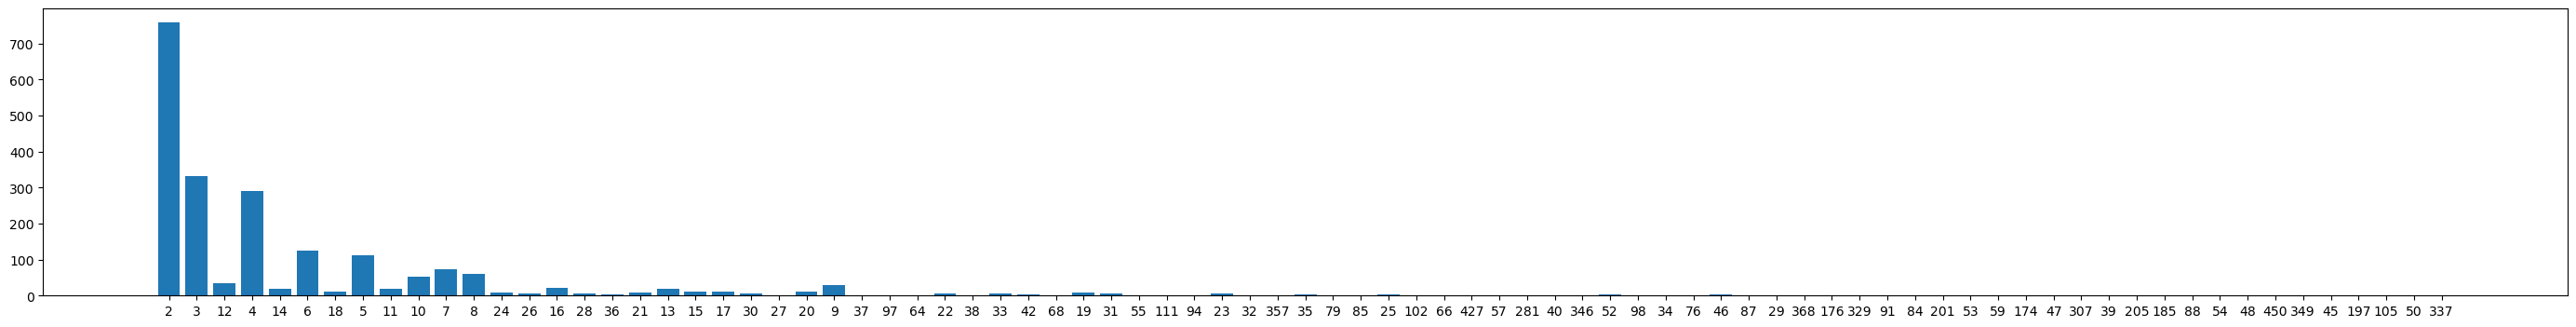

In [19]:
import matplotlib.pyplot as plt

# count number of occurences of cluster sizes:
counts = {}
for cluster in data:
    seqs = len(cluster.sequences)
    #print(f'{cluster.name} contains {seqs}')
    if seqs in counts:
        counts[seqs] += 1
    else:
        counts[seqs] = 1

# visualize the variation of cluster sizes:
plt.rcParams['figure.figsize'] = (35, 4)
plt.bar(range(len(counts)), list(counts.values()))
plt.xticks(range(len(counts)), list(counts.keys()))

plt.show()

# 1. 

For each cluster find the most similar sequence to the reference sequence, that has the opposite label (max identity or min. edited distance) and prepare dataset with four columns: `unknotted_seq`, `knotted_seq`, `identity`, `edit_distance`:

In [20]:
IDENTITY_INDEX = 1
ID_INDEX = 2
SEQ_STR_INDEX = 3
LABEL_INDEX = 4

def get_reference_and_opposite(clustered_sequences):
    # 1. divide the cluster to knotted and unknotted:
    knotted = []
    unknotted = []
    reference = None
    
    for seq_info in clustered_sequences:
        seq_str, label = get_sequence_and_label(seq_info.name)
        is_reference = seq_info.is_ref
        
        if label:
            knotted.append((seq_info.is_ref, seq_info.identity, seq_info.name, seq_str, label))
        else:
            unknotted.append((seq_info.is_ref, seq_info.identity, seq_info.name, seq_str, label))
            
        # find the reference sequence:
        if is_reference: 
            reference = (seq_info.is_ref, seq_info.identity, seq_info.name, seq_str, label)
    
    # return only the opposite set of sequences w.r.t. label of the reference sequence:
    if reference[LABEL_INDEX]: 
        return reference, unknotted 
    return reference, knotted


def get_seq_with_highest_identity(sequences):
    if len(sequences) == 1:
        return sequences[0]
    
    highest_identity = 0
    info = None
    for seq in sequences:
        if seq[IDENTITY_INDEX] > highest_identity:
            info = seq
    return info


# source: https://stackoverflow.com/questions/2460177/edit-distance-in-python
def get_edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

In [24]:
from datetime import datetime

start = datetime.now()
print(f'===> Start at {start.strftime("%H:%M:%S")}')

dataset = []

for i in range(len(data)):
    cluster = data[i]
    reference, opposite = get_reference_and_opposite(cluster.sequences)
    closest = get_seq_with_highest_identity(opposite)
    
    # reference is knotted:
    if reference[LABEL_INDEX]:
        knotted_id = reference[ID_INDEX]
        knotted_seq = reference[SEQ_STR_INDEX]
        unknotted_id = closest[ID_INDEX]
        unknotted_seq = closest[SEQ_STR_INDEX]
    # reference is unknotted:
    else:
        knotted_id = closest[ID_INDEX]
        knotted_seq = closest[SEQ_STR_INDEX]
        unknotted_id = reference[ID_INDEX]
        unknotted_seq = reference[SEQ_STR_INDEX]
    identity = closest[IDENTITY_INDEX]
    edit_distance = get_edit_distance(knotted_seq, unknotted_seq)
    
    if i % 500 == 0: 
        print(f'{cluster.name} [{i:4}/{len(data)}]: Reference is {"knotted" if reference[LABEL_INDEX] else "unknotted"}. Size of the opposite set is {len(opposite)}. Highest identity={closest[IDENTITY_INDEX]}. Edit_distance={edit_distance}')
        
    dataset.append({'knotted_id': knotted_id, 'knotted_seq': knotted_seq, 'unknotted_id': unknotted_id, 'unknotted_seq': unknotted_seq, 'identity': identity, 'edit_distance': edit_distance})
    
end = datetime.now()
print(f'===> Done at {end.strftime("%H:%M:%S")} (took {end - start})')

===> Start at 14:34:15
Cluster 121 [   0/2136]: Reference is knotted. Size of the opposite set is 1. Highest identity=97.6. Edit_distance=24
Cluster 67874 [ 500/2136]: Reference is unknotted. Size of the opposite set is 1. Highest identity=99.83. Edit_distance=12
Cluster 160634 [1000/2136]: Reference is knotted. Size of the opposite set is 1. Highest identity=100.0. Edit_distance=13
Cluster 334188 [1500/2136]: Reference is unknotted. Size of the opposite set is 1. Highest identity=97.23. Edit_distance=7
Cluster 435811 [2000/2136]: Reference is knotted. Size of the opposite set is 1. Highest identity=97.79. Edit_distance=4
===> Done at 14:38:42 (took 0:04:26.932303)


In [22]:
# df = pd.DataFrame(dataset)
df = pd.read_csv('/home/jovyan/data/unknotted_knotted.csv')
df

,knotted_id,knotted_seq,unknotted_id,unknotted_seq,identity,edit_distance
0,AF-A0A671YRA8-F1,MRKGMAPLRGQKTGLQNVFYVCLSISVAYSYNIDLEHPLVFRGPNN...,AF-A0A671YMH3-F1,MRKGMAPLRGQKTGLQNVFYVCLSISVAYSYNIDLEHPLVFRGPNN...,97.60,24
1,AF-A0A2I0MIK5-F1,VGAPREKAFPSQQANRTGGLYSCDIASSNTRCTRVVFDEETDPKME...,AF-A0A663MF78-F1,MESKEDQWMGVTVQSQGPGGNVVTCAHRYEKRQYVNTVQETRDIIG...,97.45,110
2,AF-A0A5D2WZ99-F1,MQRRKHGPKVQTKFEIQQLETEEQSSEAEASNIYNMFTDSLLLILE...,AF-A0A5D2WXV2-F1,MQRRKHGPKVQTKFEIQQLETEEQSSEAEASNIYNMFTDSLLLILE...,100.00,46
3,AF-A0A2K6RWN8-F1,MPPRQPPRQAGGGLSREFGKLLPALSHSPLGGLGSGSGSVAPGQGR...,AF-A0A2R9C450-F1,MGSRTPESPLHAVQLRWGPRRRPPLLPLLLLLLPPPPRVGGFNLDA...,99.58,87
4,AF-A0A6J3QJM2-F1,MDIAEKSDPDHHIIEDMWLGVTVASQGPAGRVLVCAHRYTQVLWSG...,AF-A0A6J3QKA3-F1,MGPGPSRAARVLRPMFCALALMVAASDRVASAFNLDTRFLVVKEAG...,100.00,173
...,...,...,...,...,...,...
2131,AF-A0A7Y8CE63-F1,MFHVILFQPEIPPNTGNVIRLCANSGCHLHLIEPIGFELDDKRLRR...,AF-A0A1H6LDD7-F1,MFHVILFQPEIPPNTGNVIRLCANSGCHLHLIEPIGFEMDDKRLRR...,97.35,4
2132,AF-A0A3D1G625-F1,MRLNIAAIGNGRNAAEQSLALDWLNRLPFRGQLNEFTSRKPAGPAR...,AF-A0A1Z9K3Q8-F1,MRLNIAAIGNGRNAAEQSLALDWLNRLPFRGQLNEFTSRKPAGPAR...,100.00,0
2133,AF-E0D4A4-F1,MCSRAPPLLQNIRVVLVNTSHPGNIGGTARAMKNMGLSRLVLVEPR...,AF-E0D4A7-F1,MCSRAPPLLQKIRVVLVNTSHPGNIGGTARAMKNMGLSRLVLVEPR...,99.26,7
2134,AF-A0A434TJ02-F1,LFLLDERGKALSSEDLAARIGQLRDSGRKALVIAIGGADGHHKSLR...,AF-A0A528TIR8-F1,FLLDERGKALSSEDLAARIGQLRDSGRKALVIAIGGADGHHKSLRE...,100.00,1


In [23]:
# df.to_csv('/home/jovyan/data/unknotted_knotted.csv', index=False)

Visualise the distribution (histogram) of `edit_distance`:

<AxesSubplot: ylabel='Frequency'>

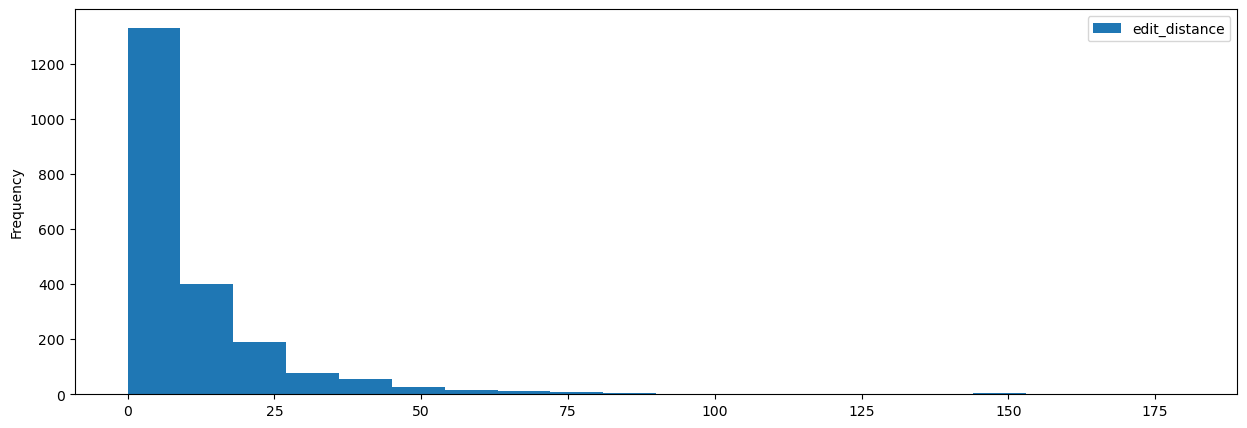

In [24]:
plt.rcParams['figure.figsize'] = (15, 5)
df.plot.hist(y='edit_distance', bins=20)

In [25]:
df['edit_distance'].value_counts()

0      293
1      179
2      164
3      145
4      135
      ... 
110      1
90       1
79       1
89       1
63       1
Name: edit_distance, Length: 94, dtype: int64

# 2.

Get TOP 10 most similar pairs:

In [26]:
# sequences that have different IDs and labels, but the exact same sequence of amino acids:
df.loc[df['edit_distance'] == 0]

,knotted_id,knotted_seq,unknotted_id,unknotted_seq,identity,edit_distance
79,AF-M7WQL8-F1,MHGLVYYIDGAPHTVDLERVTAKATLVDLSARVQLTQTYHNDSTST...,AF-A0A061B6G3-F1,MHGLVYYIDGAPHTVDLERVTAKATLVDLSARVQLTQTYHNDSTST...,100.0,0
148,AF-A0A6I0EHK7-F1,MSQSWVFVRRVSAAIFVFAAFAPTVSGQTIIIDVDRPIPLPPPPDR...,AF-A0A6L3A6R1-F1,MSQSWVFVRRVSAAIFVFAAFAPTVSGQTIIIDVDRPIPLPPPPDR...,100.0,0
150,AF-A0A0J9US27-F1,MPDFQTTEQDLHVTEDDLLEARELASKYTLEDVRHIMARVYRIHEK...,AF-W9K1K1-F1,MPDFQTTEQDLHVTEDDLLEARELASKYTLEDVRHIMARVYRIHEK...,100.0,0
156,AF-Q8YNZ7-F1,MTQTIERQAGGLYIQTPEQQQIAFPLKHTEVQAKIAGNISRVEVTQ...,AF-A0A1Z4KM07-F1,MTQTIERQAGGLYIQTPEQQQIAFPLKHTEVQAKIAGNISRVEVTQ...,100.0,0
158,AF-A0A3C1SA71-F1,MKYRFIAVCLIFMMSAPFVRAQSETGDDKTLSPYFLVKSTDSGVDQ...,AF-A0A1W9N2J2-F1,MKYRFIAVCLIFMMSAPFVRAQSETGDDKTLSPYFLVKSTDSGVDQ...,100.0,0
...,...,...,...,...,...,...
2123,AF-Q8YRU1-F1,MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKR...,AF-A0A1Z4KJ20-F1,MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKR...,100.0,0
2124,AF-A0A2S9E4B9-F1,MFRILFNAPEIPGNSGNAIRLAAITGAELHLVKPLGFNFEDANLRR...,AF-A0A2A3Y0L0-F1,MFRILFNAPEIPGNSGNAIRLAAITGAELHLVKPLGFNFEDANLRR...,100.0,0
2125,AF-A0A4R5GDG3-F1,MSGPLLHVVLFEPEKAGNVGNVARTCAVLGADLHLIRPFGFHLHDR...,AF-Q1J2A9-F1,MSGPLLHVVLFEPEKAGNVGNVARTCAVLGADLHLIRPFGFHLHDR...,100.0,0
2128,AF-A0A353EUE5-F1,MSPLHIVLVEPQIPPNAGNVARLCAAMKLTLHLVGPLGFSTEDRYL...,AF-A0A1F8WP67-F1,MSPLHIVLVEPQIPPNAGNVARLCAAMKLTLHLVGPLGFSTEDRYL...,100.0,0


In [27]:
df.loc[2123]['knotted_id'], df.loc[2123]['knotted_seq']

('AF-Q8YRU1-F1',
 'MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKRAGLDYWPYVKLHYHKTLEAFENAHQERGGRLLGFSVGGSSSYIQFPYQADDWLLFGSETTGLPPTVLSACDATLYIPMAEPGVRSLNLSVSVAVGLFEVRRQLGYLL')

In [28]:
knotted.loc[df.loc[2123]['knotted_id']]

latestVersion                                                        4
globalMetricValue                                                92.75
uniprotStart                                                         1
uniprotEnd                                                         153
uniprotSequence      MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKR...
Length                                                           153.0
Max Topology                                                       3_1
Max Freq                                                          0.79
Knot Core                                                    (79, 120)
Name: AF-Q8YRU1-F1, dtype: object

In [29]:
df.loc[2123]['unknotted_id'], df.loc[2123]['unknotted_seq']

('AF-A0A1Z4KJ20-F1',
 'MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKRAGLDYWPYVKLHYHKTLEAFENAHQERGGRLLGFSVGGSSSYIQFPYQADDWLLFGSETTGLPPTVLSACDATLYIPMAEPGVRSLNLSVSVAVGLFEVRRQLGYLL')

In [30]:
unknotted.loc[df.loc[2123]['unknotted_id']]

latestVersion                                                        4
globalMetricValue                                                92.88
uniprotStart                                                         1
uniprotEnd                                                         153
uniprotSequence      MPQVVLVNPQIPPNTGNIARTCAATGTELHLVGPLGFEISDRYLKR...
Length                                                             153
Name: AF-A0A1Z4KJ20-F1, dtype: object

In [31]:
df.loc[2123]['knotted_seq'] == df.loc[2123]['unknotted_seq']

True

In [32]:
df.loc[df['edit_distance'] < 10]

,knotted_id,knotted_seq,unknotted_id,unknotted_seq,identity,edit_distance
12,AF-A0A341BK78-F1,MNGARDEQRQHLPGGPQRQGEDCPESGGENGSASSGRRTGSDLGFY...,AF-A0A2Y9NH29-F1,MAGARDEQRQHLPGGPQSQGEDCPEGGGENGSASSGRRTGSDLGFY...,99.29,8
13,AF-Q1JH07-F1,MYKVFPTGMIRIPLQKQEFYNKDYEDLINDKVFMEQLLVASPSLYD...,AF-Q1J6S5-F1,MYKVFPTGMIRIPLQKQEFYNKDYEDLINDKVFMEQLLVASPSLYD...,99.39,6
28,AF-A0A1W4VZF5-F1,MQLLLKSIFTCALLVIFVYATAQSLAKVQESEARRAYLNLTSNSYS...,AF-A0A1W4VL95-F1,MQLLLKSIFTCALLVIFVYATAQSLAKVQESEARRAYLNLTSNSYS...,99.48,5
41,AF-A0A3Q7WRJ6-F1,MKTSAPGRTCGISLLLLLLLAALHMTTARKNDIDIYSLTVDSKVSS...,AF-A0A384D4B0-F1,MKTSAPGRTCGISLLLLLLLAALHMTTARKNDIDIYSLTVDSKVSS...,99.47,5
43,AF-K7GLL9-F1,MMRNIYEKCFECSFALVQYGSVIQTELDLQDSQDVAASLDRVQNIT...,AF-A0A4X1UGL2-F1,MMRNIYEKCFECSFALVQYGSVIQTELDLQDSQDVAASLDRVQNIT...,99.79,2
...,...,...,...,...,...,...
2131,AF-A0A7Y8CE63-F1,MFHVILFQPEIPPNTGNVIRLCANSGCHLHLIEPIGFELDDKRLRR...,AF-A0A1H6LDD7-F1,MFHVILFQPEIPPNTGNVIRLCANSGCHLHLIEPIGFEMDDKRLRR...,97.35,4
2132,AF-A0A3D1G625-F1,MRLNIAAIGNGRNAAEQSLALDWLNRLPFRGQLNEFTSRKPAGPAR...,AF-A0A1Z9K3Q8-F1,MRLNIAAIGNGRNAAEQSLALDWLNRLPFRGQLNEFTSRKPAGPAR...,100.00,0
2133,AF-E0D4A4-F1,MCSRAPPLLQNIRVVLVNTSHPGNIGGTARAMKNMGLSRLVLVEPR...,AF-E0D4A7-F1,MCSRAPPLLQKIRVVLVNTSHPGNIGGTARAMKNMGLSRLVLVEPR...,99.26,7
2134,AF-A0A434TJ02-F1,LFLLDERGKALSSEDLAARIGQLRDSGRKALVIAIGGADGHHKSLR...,AF-A0A528TIR8-F1,FLLDERGKALSSEDLAARIGQLRDSGRKALVIAIGGADGHHKSLRE...,100.00,1


Focus more on sequences with all different IDs, sequences and labels:

In [33]:
df.loc[df['edit_distance'] == 2]

,knotted_id,knotted_seq,unknotted_id,unknotted_seq,identity,edit_distance
43,AF-K7GLL9-F1,MMRNIYEKCFECSFALVQYGSVIQTELDLQDSQDVAASLDRVQNIT...,AF-A0A4X1UGL2-F1,MMRNIYEKCFECSFALVQYGSVIQTELDLQDSQDVAASLDRVQNIT...,99.79,2
72,AF-A0A2D0PKE2-F1,MERTTTVLTAFGFLLLSVSSAPITKQQDVDIYSFHINTTVNSRYAF...,AF-A0A2D0PI31-F1,MERTTTVLTAFGFLLLSVSSAPITKQQDVDIYSFHINTTVNSRYAF...,99.78,2
122,AF-A0A3P8QJG0-F1,MGRTVVQITFIIFLLVLASTQPNKDDWDIYSFHINSTVTSRYATTV...,AF-A0A3P8QHV4-F1,MGRTVVQITFIIFLLVLASTQPNKDDWDIYSFHINSTVTSRYATTV...,99.77,2
157,AF-A0A383ZIZ8-F1,MPKWPQHLEGVGWSLAMATKCRGGVGKKPSRCLQGPQGPEGLRILK...,AF-A0A383ZI59-F1,MPKWPQHLEGVGWSLAMATKCRGGVGKKPSRCLQGPQGPEGLRILK...,99.76,2
164,AF-A0A3B1KDU6-F1,MGAVCSQKRLARPGERRCGSTQYGGMQSSINMNICGLLTEKGQEVP...,AF-A0A3B1K256-F1,MGAVCSQKRLARPGERRCGSTQYGGMQSSINMNICGLLTEKGQEVP...,99.75,2
...,...,...,...,...,...,...
2099,AF-A0A1H8MS05-F1,MQLIIAAVGHKMPSWIETGFAEYAKRMPPELKIVLKEIKPVDRSGS...,AF-A0A845GJZ7-F1,MQLIIAAVGHKMPAWIETGFAEYAKRMPPELKIVLKEIKPVDRSGS...,98.72,2
2110,AF-A0A2I1RD76-F1,MFRIMFYQPCIPPNTGNAIRLAANTGCELHLIEPLGFSMSDAQVKR...,AF-A0A1C4B0M6-F1,MFRIMFYQPCIPPNTGNAIRLAANTGCELHLIEPLGFSMSDAQVKR...,98.70,2
2112,AF-V1DQ52-F1,MFHIALYEPEIAPNTGNIIRLCANNGSQLHLIEPLGFDFEEKKLRR...,AF-A0A252EU87-F1,MFHIALYEPEIAPNTGNIIRLCANNGSQLHLIEPLGFDFEEKKLRR...,98.70,2
2115,AF-A0A7I7P6I2-F1,MFKLMFYSPRIPPNTGNAIRTAAATGCELHLVEPLGFDLSEPQLRR...,AF-A0A1X0IF87-F1,MFKLMFYSPRIPPNTGNAIRTAAATGCELHLVEPLGFDLSEPQLRR...,98.70,2


Randomly choose TOP 10 sequences with minimal `edit_distance`:

In [34]:
df.loc[df['edit_distance'] == 2].sample(10, random_state=42)

,knotted_id,knotted_seq,unknotted_id,unknotted_seq,identity,edit_distance
1895,AF-A0A1I1KW65-F1,MRIDIITVVPDILKSPFEASILKRAIEKGHVEIHLHNLRDYVTDNY...,AF-A0A1Y1T0W4-F1,MRIDIITVVPDILKSPFEASILKRAIEKGHVEIHLHNLRDYVTDNY...,99.12,2
1760,AF-A0A0T9QAI9-F1,MAMLAASFSSVAAEHAPHWGYEGQDGPENWSKLSPDFSLCNTGKNQ...,AF-A0A0H5LSC0-F1,MAMLAASFSSVAAEHAPHWGYEGQDGPENWSKLSPDFSLCSTGKNQ...,99.16,2
1871,AF-A0A7G6ATS6-F1,MVSNHDPHTSRRLICPICQRALSACICHWTSPIDHAIDVLILQHPL...,AF-A0A1V2VCP9-F1,MVSNHDPHTSRRLICPICQRALSACICHWTSPIDHAIDVLILQHPL...,99.12,2
1162,AF-A0A5C6WCQ6-F1,MAGNSQRRNRRTSNKKGAQVGSGGKRRRSLEGKGPTPPASARKGHV...,AF-A0A2M8XKI3-F1,MAGNSQRRNRRTSNKKGAQVGSGGKRRRSLEGKGPTPPASARKGHV...,99.37,2
1619,AF-A0A2J4RFH2-F1,MKTTLGKAALLALSMMPVTVFASHWSYEGEGSPEHWGALNEEYKTC...,AF-A0A0H3H296-F1,MKTTLGKAALLALSMMPVTVFASHWSYEGEGSPEHWGALNEEYKTC...,99.19,2
681,AF-A0A1F8IC52-F1,MNRWLFLWRKTRRQLWVRATAYAVFGLAASLLAAALSPWVPQDMAE...,AF-A0A6G7EIS4-F1,MNRWLFLWRKTRRQLWVRATAYAVFGLAASLLAAALSPWVPRDMAE...,99.51,2
2095,AF-A0A0B4DUM1-F1,MRLHICAAGRLRSGPEKSLIDDYLTRFDRTGRALGLGPARVVEIED...,AF-A0A1B8S7G1-F1,MRLHICAAGRLRSGPEKSLIDDYLTRFDRTGRALGLGPARVVEIED...,98.72,2
1096,AF-A0A1M5NVA8-F1,MILPIVAIVLGLGVLVWSADKFVDGAVGVAKFCGMSTLLIGMVIVG...,AF-A0A1M7L0Q8-F1,MILPIVAIVLGLGVLVWSADKFVDGAVGVAKFCGMSTLLIGMVIVG...,99.41,2
1661,AF-A0A654DA54-F1,MKRNLLLAAMLAASFSIGAAEQHQHWSYEGQEDPAHWGKLSPDFAL...,AF-A0A1S8CJR1-F1,MKRNLLLAAMLAASFSIGAAEQHQHWSYEGQEDPAHWGKLSPDFAL...,99.18,2
2010,AF-A0A1F6NF31-F1,MKKWDYKIIPRPAIKPGGVILFMRKNFFYLILPNIRSCHNVGAMFR...,AF-A0A1F6NTN2-F1,MKKWDYKIIPRPAIKPGGVILFMRKNFFYLILPNIRSCHNVGAMFR...,98.85,2


In [35]:
indexes = [1895, 1760, 1871, 1162, 1619, 681, 2095, 1096, 1661, 2010]

Get sequences whose 3D structure will be generated using OmegaFold:

In [36]:
# export to a FASTA file:
f = open('/home/jovyan/data/unknotted_knotted.fasta', 'w')

for i in indexes:
    f.write(f'>id{i},knotted,{df.loc[i]["knotted_id"]}\n{df.loc[i]["knotted_seq"]}\n')
    f.write(f'>id{i},uknotted,{df.loc[i]["unknotted_id"]}\n{df.loc[i]["unknotted_seq"]}\n')
    
f.close()

### Next steps:

#### 3. Generate 3D structures using OmegaFold

https://github.com/HeliXonProtein/OmegaFold

```bash
$ pip install git+https://github.com/HeliXonProtein/OmegaFold.git
$ git clone https://github.com/HeliXonProtein/OmegaFold
$ cd OmegaFold
$ python setup.py install
$ omegafold /home/jovyan/data/unknotted_knotted.fasta /home/jovyan/data/omegafold_output/
```

#### 4. Get knotted predictions using Topoly

https://github.com/ilbsm/topoly_tutorial/

In [38]:
!pip install topoly --quiet

In [39]:
import os
from topoly import find_loops
from topoly.params import test

find_loops = test(find_loops)
directory_path = '/home/jovyan/data/omegafold_output/'

In [40]:
# finding loops (and other loop-like structures):

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if file_path.endswith('.pdb'):
        results  = find_loops(file_path)
        print(f'{filename}: {results}')

id1096,knotted,AF-A0A1M5NVA8-F1.pdb: []
id1619,uknotted,AF-A0A0H3H296-F1.pdb: []
id681,knotted,AF-A0A1F8IC52-F1.pdb: []
id1619,knotted,AF-A0A2J4RFH2-F1.pdb: []
id2095,uknotted,AF-A0A1B8S7G1-F1.pdb: []
id681,uknotted,AF-A0A6G7EIS4-F1.pdb: []
id1760,uknotted,AF-A0A0H5LSC0-F1.pdb: []
id1895,knotted,AF-A0A1I1KW65-F1.pdb: []
id2095,knotted,AF-A0A0B4DUM1-F1.pdb: []
id2010,knotted,AF-A0A1F6NF31-F1.pdb: []
id1162,uknotted,AF-A0A2M8XKI3-F1.pdb: []
id1871,uknotted,AF-A0A1V2VCP9-F1.pdb: []
id1096,uknotted,AF-A0A1M7L0Q8-F1.pdb: []
id1871,knotted,AF-A0A7G6ATS6-F1.pdb: []
id1760,knotted,AF-A0A0T9QAI9-F1.pdb: []
id1661,knotted,AF-A0A654DA54-F1.pdb: []
id1661,uknotted,AF-A0A1S8CJR1-F1.pdb: []
id1162,knotted,AF-A0A5C6WCQ6-F1.pdb: []
id2010,uknotted,AF-A0A1F6NTN2-F1.pdb: []
id1895,uknotted,AF-A0A1Y1T0W4-F1.pdb: []


In [41]:
from topoly import  homfly
# https://github.com/ilbsm/topoly_tutorial/blob/master/knots_links.py

# knots, links and their polynomials:
homfly = test(homfly)

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    if file_path.endswith('.pdb'):
        open_chain = homfly(file_path)
        print(f'{filename}: {open_chain}')

id1096,knotted,AF-A0A1M5NVA8-F1.pdb: {'0_1': 0.14, '3_1': 0.805}
id1619,uknotted,AF-A0A0H3H296-F1.pdb: {'0_1': 0.43, '3_1': 0.49}
id681,knotted,AF-A0A1F8IC52-F1.pdb: {'3_1': 0.695, '0_1': 0.255}
id1619,knotted,AF-A0A2J4RFH2-F1.pdb: {'0_1': 0.425, '3_1': 0.52}
id2095,uknotted,AF-A0A1B8S7G1-F1.pdb: {'3_1': 0.705, '5_1': 0.135, '0_1': 0.06}
id681,uknotted,AF-A0A6G7EIS4-F1.pdb: {'3_1': 0.65, '0_1': 0.27}
id1760,uknotted,AF-A0A0H5LSC0-F1.pdb: {'0_1': 0.445, '3_1': 0.46}
id1895,knotted,AF-A0A1I1KW65-F1.pdb: {'3_1': 0.815, '5_1': 0.11}
id2095,knotted,AF-A0A0B4DUM1-F1.pdb: {'3_1': 0.67, '5_1': 0.18, '0_1': 0.03}
id2010,knotted,AF-A0A1F6NF31-F1.pdb: {'3_1': 0.68, '0_1': 0.18}
id1162,uknotted,AF-A0A2M8XKI3-F1.pdb: {'3_1': 0.84, '0_1': 0.05}
id1871,uknotted,AF-A0A1V2VCP9-F1.pdb: {'3_1': 0.915, '0_1': 0.045}
id1096,uknotted,AF-A0A1M7L0Q8-F1.pdb: {'0_1': 0.105, '3_1': 0.81}
id1871,knotted,AF-A0A7G6ATS6-F1.pdb: {'3_1': 0.895, '0_1': 0.04}
id1760,knotted,AF-A0A0T9QAI9-F1.pdb: {'0_1': 0.465, '3_1': 0.